# Prediksi Harga Saham

Install package untuk machine learning `scikit learn`:
```
conda activate big-data
pip install scikit-learn
```


In [3]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf  # We will use this library to upload latest data from Yahoo API

%matplotlib inline
plt.style.use('fivethirtyeight')


In [4]:
# define the ticker you will use
msft = yf.Ticker('MSFT')
#Display stock information, it will give you a summary description of the ticker
msft.info


{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 221000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that provides a collaboration platform and code hosting service for developers; Nuance provides healthcare and enterprise AI solutions; and Azure, a cloud platform. It also offers enterprise

In [6]:
history = msft.history(period="Max")
df = pd.DataFrame(history)
df.head(10)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0
1986-03-20 00:00:00-05:00,0.061351,0.061351,0.059180,0.059723,58435200,0.0,0.0
1986-03-21 00:00:00-05:00,0.059723,0.060809,0.057008,0.058094,59990400,0.0,0.0
1986-03-24 00:00:00-05:00,0.058094,0.058094,0.055922,0.056465,65289600,0.0,0.0
1986-03-25 00:00:00-05:00,0.056465,0.057551,0.055922,0.057551,32083200,0.0,0.0


In [7]:
# defining x and y 
x = df.index
y = df['Close']
y


Date
1986-03-13 00:00:00-05:00      0.060809
1986-03-14 00:00:00-05:00      0.062980
1986-03-17 00:00:00-05:00      0.064067
1986-03-18 00:00:00-05:00      0.062437
1986-03-19 00:00:00-05:00      0.061351
                                ...    
2022-12-09 00:00:00-05:00    245.419998
2022-12-12 00:00:00-05:00    252.509995
2022-12-13 00:00:00-05:00    256.920013
2022-12-14 00:00:00-05:00    257.220001
2022-12-15 00:00:00-05:00    249.009995
Name: Close, Length: 9267, dtype: float64

In [8]:
# Data Exploration
# i like to set up a plot function so i can reuse it at later stages of this analysis 
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


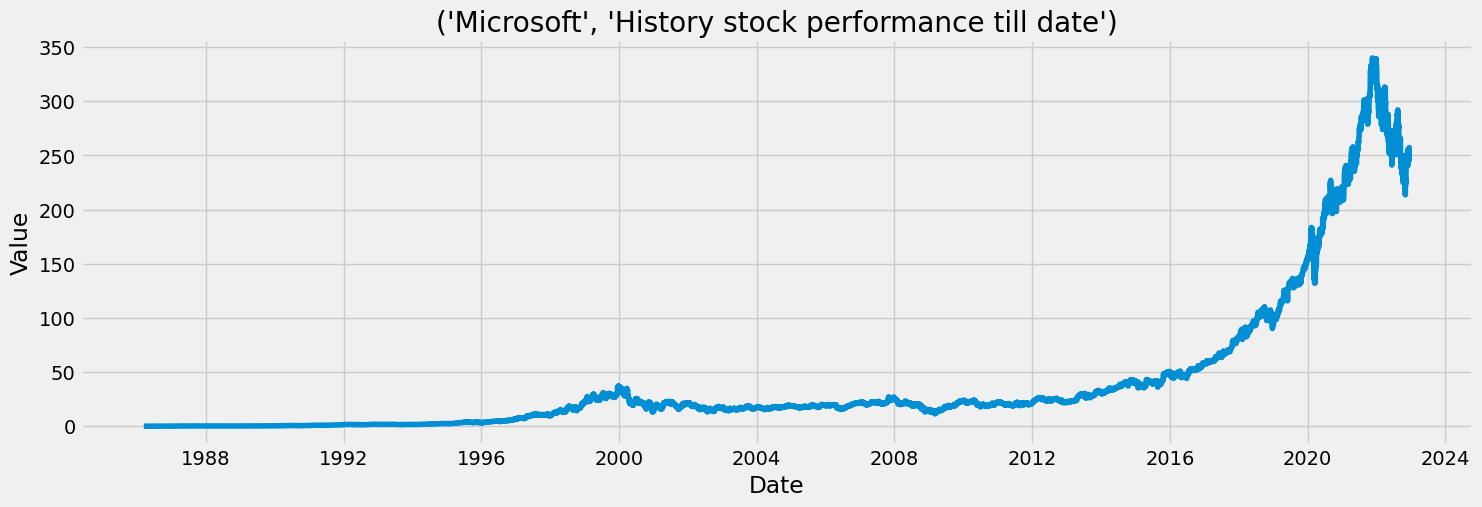

In [9]:
stock_name= "Microsoft"
title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)


In [10]:
# Data Processing and scaling
# by reset index and convert it to column
df.reset_index(inplace=True)


In [15]:
df['date'] = pd.to_datetime(df.Date)


In [25]:
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
0,1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0,1986-03-13 00:00:00-05:00
1,1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0,1986-03-14 00:00:00-05:00
2,1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0,1986-03-17 00:00:00-05:00
3,1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,67766400,0.0,0.0,1986-03-18 00:00:00-05:00
4,1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0,1986-03-19 00:00:00-05:00


In [17]:
x = df[['Open', 'High','Low', 'Volume']]
y = df['Close']


In [18]:
# Linear regression Model for stock prediction 
train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    test_size=0.15,
                                                    shuffle=False,
                                                    random_state = 0)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print(f"{regression.coef_ = }")
print(f"{regression.intercept_ = }")


regression.coef_ = array([-5.69444912e-01,  7.81230122e-01,  7.88662452e-01, -3.96521829e-11])
regression.intercept_ = -0.0012405498506460333


In [21]:
predicted=regression.predict(test_x)
print(test_x.head())


           Open       High        Low    Volume
7876  67.144414  67.181696  63.928860  49187400
7877  64.544005  65.187117  63.500114  47761700
7878  65.261655  66.007292  65.205734  25258600
7879  66.091197  66.268280  64.711769  25510700
7880  64.562627  65.438750  64.124572  26068700


In [22]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)


,Actual_Price,Predicted_Price
7876,65.541298,64.664420
7877,65.037987,64.248905
7878,65.848846,65.827040
7879,65.494682,65.168971
7880,65.149818,64.928231
7881,65.243034,64.860875
7882,66.053894,65.946389
7883,65.159172,65.372881
7884,65.494682,65.566102
7885,65.485344,65.199892


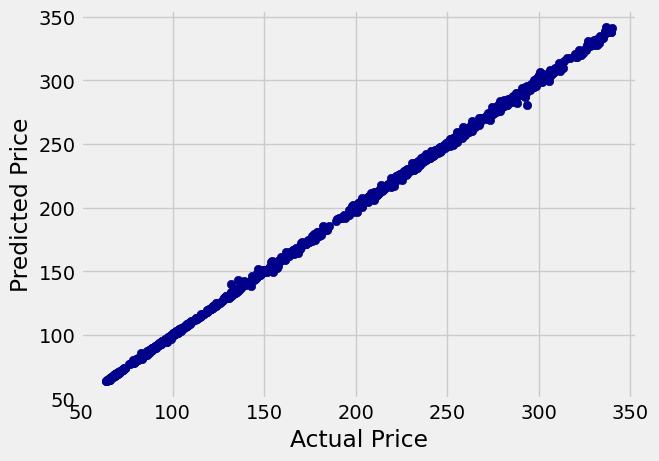

In [23]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


In [26]:
print('Mean Absolute Error (MAE):',
      metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :',
      metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):',
      np.sqrt(metrics.mean_squared_error(test_y, predicted)))


Mean Absolute Error (MAE): 0.8602198098154493
Mean Squared Error (MSE) : 1.7420419561129539
Root Mean Squared Error (RMSE): 1.3198643703475572


In [27]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)


The accuracy of the model is  100.03060001717319


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


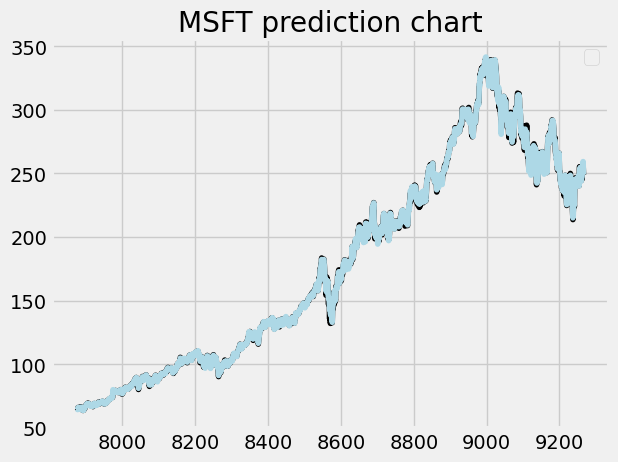

In [24]:
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='lightblue')
plt.title("MSFT prediction chart")
plt.legend();
